In [1]:
# Import libraries (excluding sklearn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

# Load dataset
from google.colab import drive

### INTRODUCTION

With the rise of housing prices in recent times, the price of living continues to increase as time goes on. There are numerous youths and young adults that have expressed their concern over this, worrying that they will not be able to buy a place to live in the near future. Even a country like the US experiences rising costs! So, many people look to the past and reminisce on lower prices; back when inflation was lower. However, it begs the question: how were housing prices in the past? And are they indeed lower than current prices?

The objective of this study is to observe the house values of a given location in the past, and aims to estimate said values by developing a machine learning algorithm that can predict house values, based on given information such as: number of bedrooms or bathrooms, income of house owners, and population. The group has decided to have a look at past housing prices out of curiosity; it is well-known that housing prices have only increased over the past few years, yet the group is unsure of how they looked like in the past. As for the chosen objective, it is to get a grasp of how the economic landscape was like in the past – at least, in terms of housing. In addition, this would help verify the common sentiment that things of the past were more affordable compared to nowadays, but in an alternative angle compared to studying history. By developing an algorithm that can accurately predict housing prices in a certain timeframe, perhaps this can be extended to apply to other timeframes, or in the present time.


### DATASET

In [2]:
# Load dataset
drive.mount('/content/drive')
dataset_file = "housing.csv"
dataset_path = "/content/drive/Shareddrives/[CSINTSY] MC03 Group 07/housing.csv"
dataset = pd.read_csv(dataset_path)

# Dataset columns
features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value", "median_income", "ocean_proximity"]

# Display random sample of size 15 from the dataset
dataset.sample(n=15)

Mounted at /content/drive


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4454,-118.17,34.10,37.0,299.0,89.0,318.0,92.0,1.3125,145800.0,<1H OCEAN
54,-122.28,37.82,52.0,1170.0,235.0,701.0,233.0,1.6098,87500.0,NEAR BAY
6847,-118.14,34.07,42.0,1036.0,199.0,656.0,215.0,4.1902,235000.0,<1H OCEAN
315,-122.19,37.76,45.0,995.0,238.0,630.0,237.0,1.9250,74100.0,NEAR BAY
13421,-117.49,34.04,4.0,6034.0,1170.0,3527.0,1098.0,4.1775,143700.0,INLAND
8448,-118.38,33.91,36.0,2904.0,515.0,1463.0,534.0,5.8374,289600.0,<1H OCEAN
1343,-121.89,38.01,32.0,1000.0,188.0,663.0,212.0,4.0972,99200.0,INLAND
535,-122.27,37.78,13.0,2020.0,535.0,959.0,486.0,5.2601,292700.0,NEAR BAY
2213,-119.84,36.85,8.0,3791.0,487.0,1424.0,475.0,10.5144,345900.0,INLAND
6654,-118.12,34.16,30.0,1762.0,416.0,940.0,398.0,2.8631,188600.0,<1H OCEAN


Link to dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices

The dataset chosen by the group consists of data about the prices of Californian housing in a certain district, taken from a 1990 census.

The dataset contains 10 columns of information, explained in full detail according to the given descriptions:

1. **longitude**: A measure of how far west a house is; a higher value is farther west. Think of this as the *x* value in a 2D plot (further west is *-x*).

2. **latitude**: A measure of how far north a house is; a higher value is farther north. This would be the *y* value of a 2D plot (further north is *+y*).

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building.

4. **totalRooms**: Total number of rooms in houses, within a block.

5. **totalBedrooms**: Total number of bedrooms in houses, within a block.

6. **population**: Total number of people residing in houses, within a block.

7. **households**: Total number of households, a group of people residing within a home unit, for a block. Can be an approximate number of houses found within a block.

8. **medianIncome**: Median income for households within a block of houses (measured by $10,000).

9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars).

10. **oceanProximity**: Location of the house w.r.t ocean/sea (NEAR BAY, BY OCEAN, etc.)

The target variable of interest is **medianHouseValue**. Although it is not a precise price for a single house, it does give a generalized price for a bunch of houses within a given block, meaning that the coverage of the dataset is much more expansive as it takes into account hundreds, if not thousands, of households in the state of California.

As for the machine learning algorithm for predicting **medianHouseValue**, this study will be using **Linear Regression**. Due to the house values being numeric, the group believes that this model would best fit the dataset.

DATA CLEANING

With the dataset has been determined, the next step is to pre-process the data for any missing/duplicated data within the cells. Once those have been determined, the specific data is either removed or filled in with a value.

Pre-processing the data aims to prepare and organize the data so that when it is used later in the program, there are no complications with missing/duplicated values and the program returns the most accurate result as possible.

In addition to pre-processing, this task also checks the size (rows and columns) of the dataset, enumerates the variables, and provides mathematical information about the dataset. (count, mean, standard deviation, etc.)

This is the current size of the dataset, pre-data cleaning.

In [ ]:
print("Number of entries in the dataset is:", dataset.shape[0])

Number of entries in the dataset is: 20640


In [ ]:
# Look for incomplete rows
print(dataset.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Drop the incomplete rows
dataset = dataset.dropna()

There are no duplicate rows found in the dataset, but to be certain that there isn't, **.drop_duplicates()** is ran.

In [ ]:
# Look for duplicate rows
duplicates = dataset[dataset.duplicated()]
duplicates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# Drop duplicate rows
dataset = dataset.drop_duplicates()

In [ ]:
print("Number of entries in the dataset is:", dataset.shape[0])

Number of entries in the dataset is: 20433


Notice that the size of the dataset has decreased to 20433 entries after data cleaning, but now each entry is guaranteed to not be duplicates or have null values.

In [ ]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**dataset.describe()** is ran to get an idea of the behaviour of the dataset. To give a brief analysis of the given statistics:


*   The average median house value in California, in 1990, is about USD 200,000. However, the standard deviation is about USD 115,000. This suggests that the price range of median house values are dispersed.
  - The median (50% percentile) of the median house values is USD 179,700. This suggests the dataset of house values is skewed to the right.
*   The maximum median house value, which would suggest being the most expensive one has to spend for a house in California back in 1990, is USD 500,001. Meanwhile, the minimum median house value, meaning the cheapest median house price, is USD 14,999.
  -   This huge range of prices would explain the high standard deviation.
- The standard deviation of both longitude and latitude values is about 2, suggesting that locations of blocks of houses were relatively close to each other.
- The average amount of households in one block is about 500, with the average population in one block being about 1,425.





DATA CLASSIFICATION

Next is to determine the independent and dependent variables to be used in the prediction model.

In [ ]:
# Independent variables
ind = dataset.drop(columns=["median_house_value"], axis=1)
ind.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY


In [ ]:
# Dependent variables
dep = dataset["median_house_value"]
dep.head(10)

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
5,269700.0
6,299200.0
7,241400.0
8,226700.0
9,261100.0


Before going into the implementation of the prediction model, note that from **dataset.info()**, a column's data type is categorical (**ocean_proximity**). Hence, this is taken note of by **ind_cat_cols**, with the numerical columns in **ind_num_cols**.

In [ ]:
# Identify column data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
# Only "ocean_proximity" has categorical values
ind_num_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
ind_cat_cols = ["ocean_proximity"]

# Shows the different categories found under 'ocean_proximity'
dataset["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### METHODOLOGY

As mentioned previously, the model will be **Linear Regression**. Below is to prepare the data for model implementation.

In [ ]:
# Create preprocessor for model pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ind_num_cols), # Numerical value scaling
        ("cat", OneHotEncoder(drop="first"), ind_cat_cols) # Categorial value encoding
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

The dataset needs to be split into the training dataset and the testing dataset. The former will be used to train the algorithm in predicting house values via **Linear Regression**, while the latter will be used to test the prediction model.

In [ ]:
# Split data to train and test (70:30 split)
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size=0.3)

With the data now cleaned up and ready to be implemented into the model, the actual model implementation can begin.

In [ ]:
# Fit the model to the training data
model.fit(ind_train, dep_train)

# Test the model
dep_pred = model.predict(ind_test)

### RESULTS AND ANALYSIS

Because **Linear Regression** has been chosen, the follwing have been chosen to analyse the results of the model.

NOTES ON ANOVA TEST

Part of analysing the results of the model is the ANOVA test. The independent variable that will be used is the **ocean_proximity** because based on the data set, there is variance in house prices for houses situated in different ocean proximity categories. For this ANOVA test, we use a significance level of 0.05, which is a standard choice for data sets like the one being used here.

We formulate the *null hypothesis* as follows:
there is no significant change in house value given the different categories of house based on ocean proximity.

The *alternate hypothesis* is as follows:
there is a significant change in house value given the different categories of house based on ocean proximity.


In [ ]:
# R-Square
r2 = r2_score(dep_test, dep_pred)
print("R-Squared:", r2)

# Coefficients
coefficients = model.named_steps["model"].coef_
feature_names = list(ind.drop(columns=["ocean_proximity"]).columns) + list(preprocessor.named_transformers_["cat"].get_feature_names_out())
coeff_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Mean Squared Error
mse = mean_squared_error(dep_test, dep_pred)
print("MSE:", mse)

# Mean Absolute Error
msa = mean_absolute_error(dep_test, dep_pred)
print("MSA:", msa)

# ANOVA
from scipy.stats import f_oneway # Import ANOVA function from scipy library
# Find all house values under each ocean_proximity category
x = pd.concat([ind_test, dep_test], axis=1)
a = x[["median_house_value", "ocean_proximity"]]
b = a.groupby("ocean_proximity")["median_house_value"].apply(list)
c = b.loc["NEAR BAY"]
d = b.loc["<1H OCEAN"]
e = b.loc["INLAND"]
f = b.loc["NEAR OCEAN"]
g = b.loc["ISLAND"]
print(f_oneway(c, d, e, f, g))

# Coefficient per feature
coeff_df

R-Squared: 0.635385084517627
MSE: 4868301721.397922
MSA: 50090.37021409354
F_onewayResult(statistic=433.693949776192, pvalue=0.0)


,Feature,Coefficient
0,longitude,-52688.622099
1,latitude,-53640.770246
2,housing_median_age,13400.772521
3,total_rooms,-11222.421045
4,total_bedrooms,35033.412436
5,population,-46435.482088
6,households,27570.127285
7,median_income,73612.497625
8,ocean_proximity_INLAND,-41078.941189
9,ocean_proximity_ISLAND,148911.334686


The R-Square is at 0.65, being somewhat close to 1. However, for a huge dataset, the R-Square value is good, supporting that the model is fit for the data.

The MSA value sits at about 50,000. This is a pretty good value for prices that go up to the hundred thousands. However, the MSE is skyrocketed at about 47,000,000,000. This suggests that the house values are heavily varied, which has been found previously (high standard deviation of **median_house_value**)

The ANOVA test showed a big F statistic which indicates that the group mean per each category are significantly different.  The p value also showed to be less than the significance level, which means that the null hypothesis should be rejected. Thus, the results from the model prove the altenate hypothesis, that difference in ocean proximity contributes to the house value.

Note that the ANOVA test does not validate if the predicted results are consistent with the actual house value. For this study, the other tests provide analysis on this.

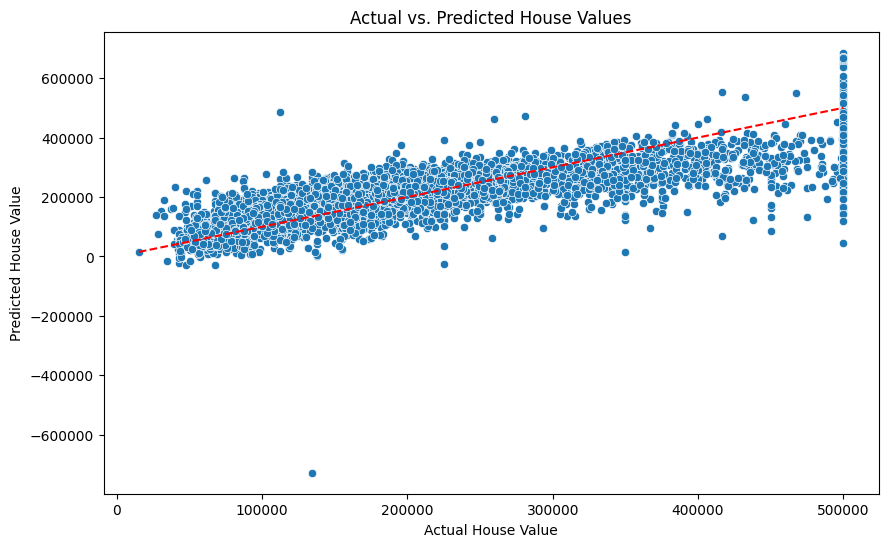

In [ ]:
# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dep_test, y=dep_pred)
plt.plot([dep_test.min(), dep_test.max()], [dep_test.min(), dep_test.max()], 'r--')
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.show()

As seen above, the model does do a decent job at predicting house values, with the majority of values roughly following the line; only a few outliers do not follow. However, actuals values of USD 500,000 are seen to be clear outliers.

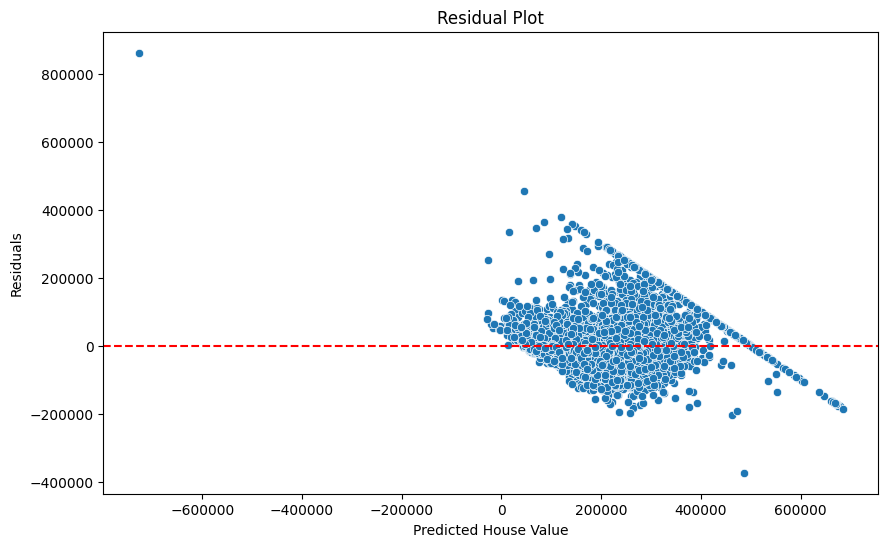

In [ ]:
# Residual plot
residuals = dep_test - dep_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dep_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals')
plt.show()

When plotted, the majority of residuals follow an increasing trend. This is not desirebale for a prediction model, for it tells that there are more fluctuations of house values as the predicted house value increases, rather than a prefered constant variance.

Note that in addition to the outliers, a diagonal line of residuals is found that goes against the trend of residuals. The group hypothesizes that this could be due to the actual USD 500,000 values.

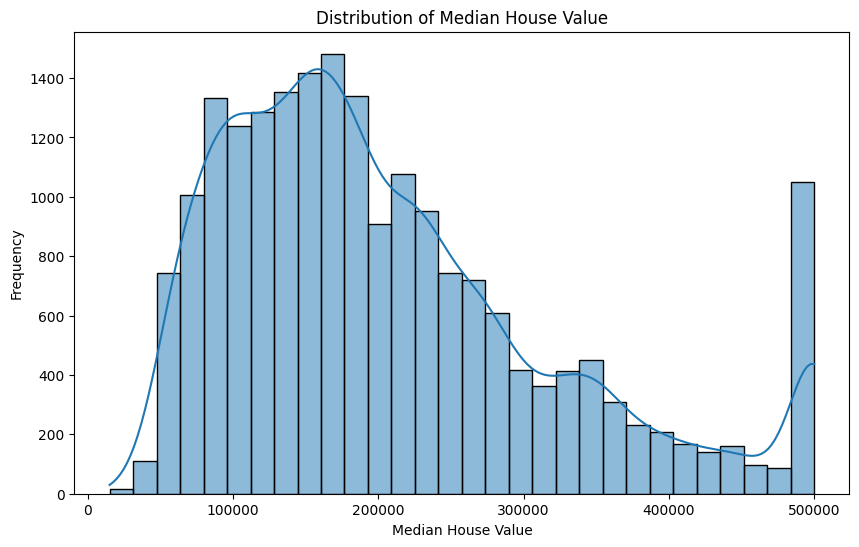

In [ ]:
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(dataset['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

From the analysis for the statistics computed before, the distribution of **median_house_value** seems to be skewed to the right. This is shown in the histogram above, where again the house values of USD 500,000 go against the distribution.

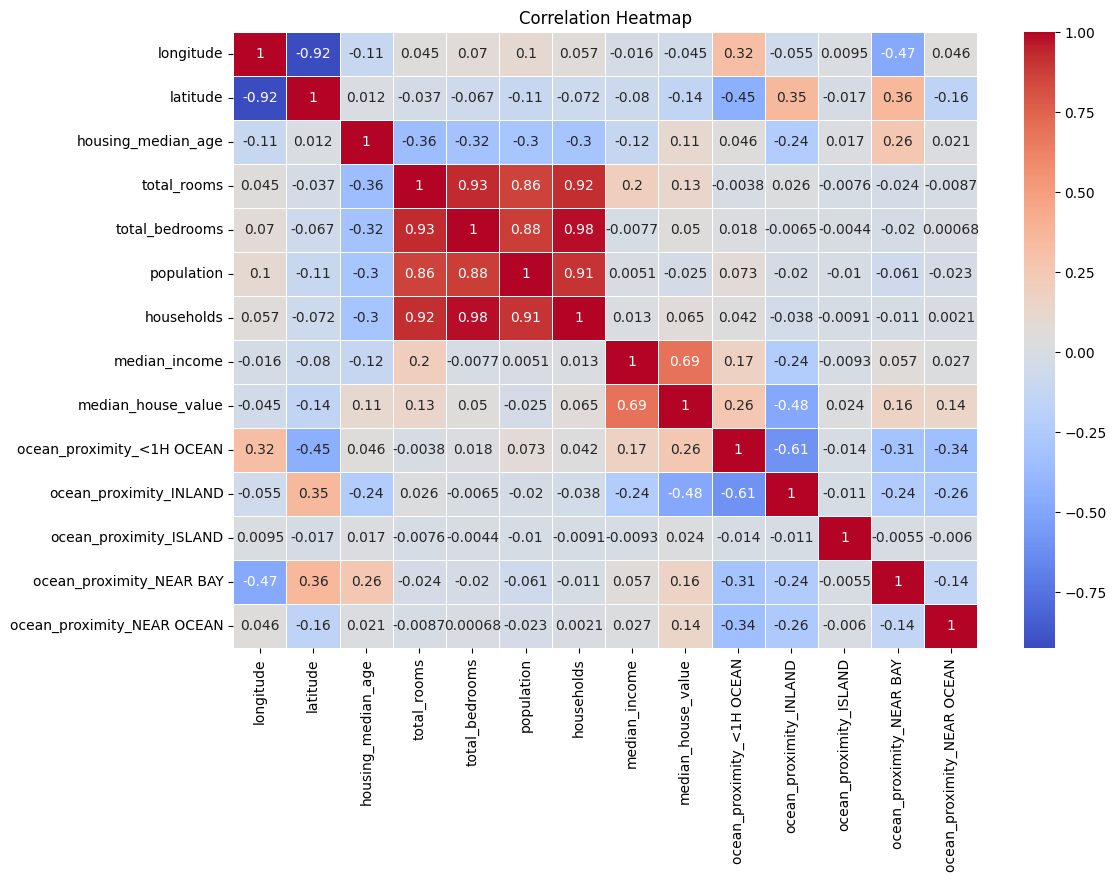

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = pd.get_dummies(dataset, columns=["ocean_proximity"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Focusing on the desired **medianHouseValue**, the variable that has the most correlation with the desired is **median_income** at 0.69. Coming second is **ocean_proximity_<1H OCEAN**, with a correlation value of 0.26. Third and fourth are **total_rooms** and **housing_median_age**, at 0.13 and 0.11 respectively.

Note that the categories from **ocean_proximity** that have some correlation to the house values are **ocean_proximity_NEAR BAY** and **ocean_proximity_NEAR OCEAN**.

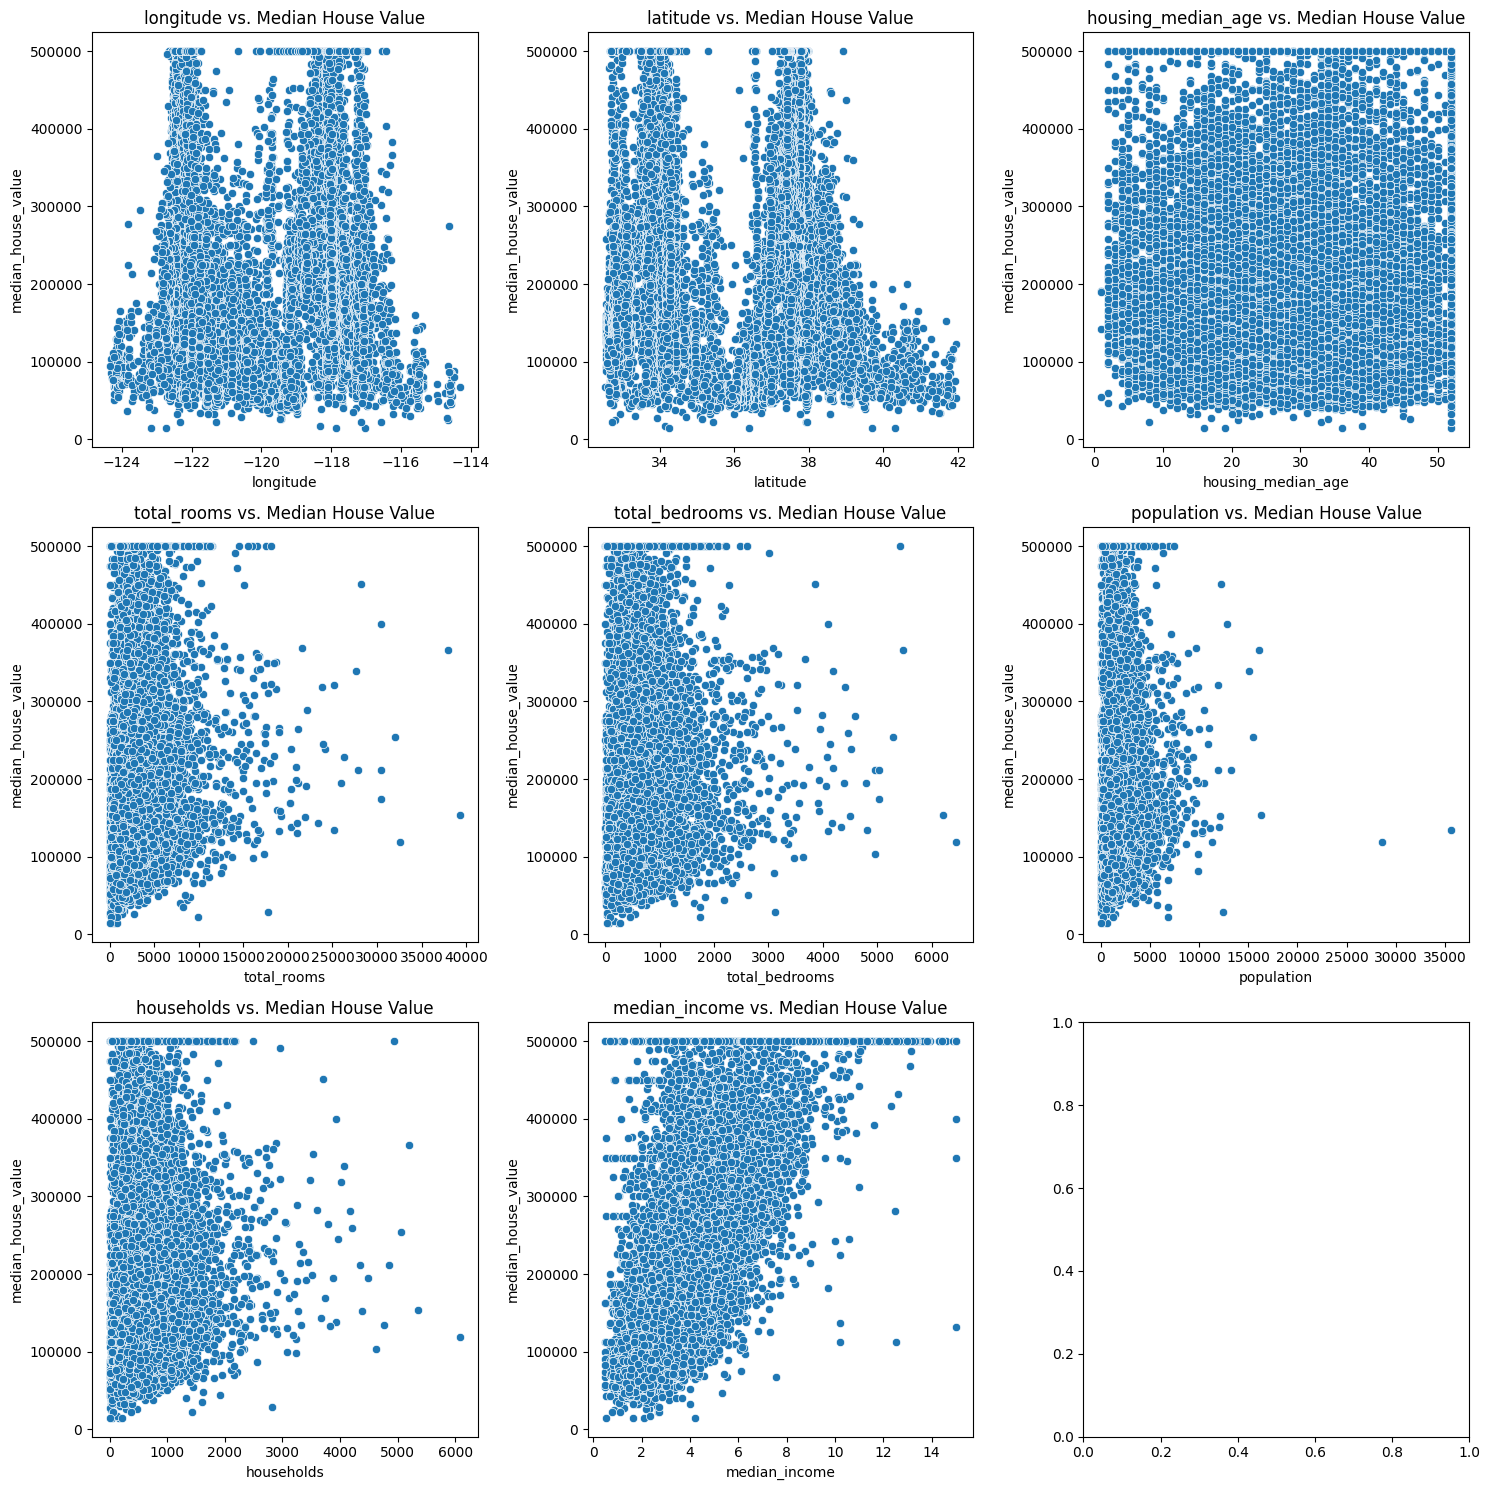

In [ ]:
# Scatter plots for each numerical feature against the target variable
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for ax, feature in zip(axs.flatten(), dataset.columns[:-2]):
    sns.scatterplot(data=dataset, x=feature, y='median_house_value', ax=ax)
    ax.set_title(f'{feature} vs. Median House Value')
plt.tight_layout()
plt.show()

From the scatterplots above, a few things are shown:
*   The variables that have close to none increasing/decreasnig correlation with **median_house_value** are: **longitude**, **latitude**, **housing_median_age**, **total_rooms**, **total_bedrooms**, **population** and **households**.
  - The scatterplot of **housing_median_age** vs. **median_house_value** shows that there is zero correlation between the two.
  - The only varibale to have a positive correlation with **median_house_value** is **median_income**.
  - Again, **median_house_value** of 500,000 do not follow the correlation at all.
*   Majority of the higher **median_house_value** are around **longitude** -122 & -118 and **latitude** 34 & 38.



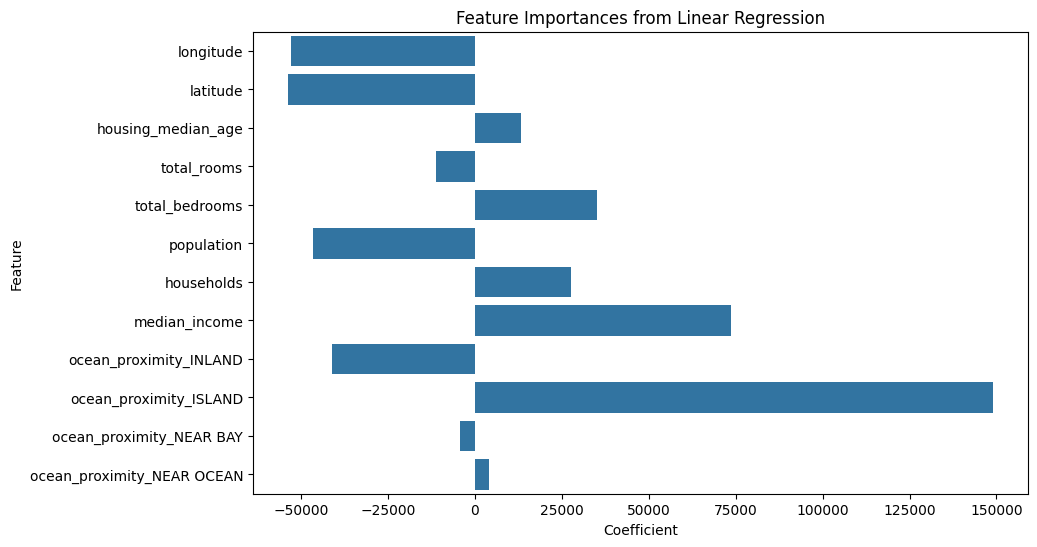

In [ ]:
# Feature Importance
# The coefficients of each feature
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Importances from Linear Regression')
plt.show()

Taking the coefficients of each independent variable, the feature importances is constructed. From the graph, **ocean_proximity_ISLAND** yields the highest coefficient, with **median_income** and **total_bedrooms** as second and third. Meanwhile, **longitude** and **latitude** both have the lowest coefficient values, with **population** and **ocean_proximity_INLAND** following suit.

With all analyses in mind, the group can conclude the following:
*   There is evidence that the model is fit for predicting house values. However, majority of the variables do a poor job at predicting. Only a few variables do well, which are the income of household in a block and how close the house is to the ocean.

    * This suggests that the actual location of the house may not have much bearing on the house price, but rather what the location can provide, i.e ocean proximity. Categories of ocean proximity that are near the ocean do yield higher correlation values.
    * While it can be argued that the number of rooms/bedrooms can determine the house price, there is not enough evidence to support this claim.
*   The features importance graph gives interesting results, for the amount of people in one block and it being inland (furthest away from the ocean) have negative correlation with house prices. This could mean that these houses or blocks are undesireable, resulting in lower prices compared to other places.
* The group's hypothesis has repeatedly been showing up in multiple graphs, further confirming that the outlying values of USD 500,000 may be going against the behaviour of the dataset.



### TESTING HYPOTHESIS

To test the group's hypothesis, changes to the dataset must be made. To be specific, the removal of all entries with a **median_house_value** of 500,000 or higher.

In [ ]:
# Removes all entries with a median_house_value of 500,000 or higher
newdataset = dataset.drop(dataset[dataset['median_house_value'] >= 500000].index)
newdataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000
mean,-119.563485,35.653467,28.364716,2621.072090,539.645825,1440.852016,501.099907,3.676430,192017.667421
std,2.005890,2.150518,12.510260,2185.975435,422.553057,1144.831193,383.334391,1.569596,97095.550517
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,797.000000,282.000000,2.526275,116400.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450750,173700.000000
75%,-117.990000,37.730000,37.000000,3119.000000,648.000000,1744.250000,606.000000,4.583300,247800.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000


Note that the max **median_house_value** is now 499,100. Also, the number of entries is now 19,448.

Again, the new dataset must be prepared for model implementation.

In [ ]:
# Independent variables for the new dataset
ind = newdataset.drop(columns=["median_house_value"], axis=1)
ind.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY


In [ ]:
# Dependent variables for the new dataset
dep = newdataset["median_house_value"]
dep.head(10)

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
5,269700.0
6,299200.0
7,241400.0
8,226700.0
9,261100.0


Since the numerical and categorical independent variables remain unchanged, **ind_num_col** and **ind_cat_col** will remain the same.

In [ ]:
print(ind_num_cols)
print(ind_cat_cols)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']


Since the only changes made to the dataset was the removal of entities, the same **preprocessor** and **model** can be used. However, the new data needs to be split into the training data and testing data.

In [ ]:
# Split new data to train and test (70:30 split)
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size=0.3)

In [ ]:
# Fit the model to the training data
model.fit(ind_train, dep_train)

# Test the model
dep_pred = model.predict(ind_test)

ANALYSING ON THE NEW DATASET

To reiterate the hypotheses to be tested by ANOVA:

We formulate the *null hypothesis* as follows:
there is no significant change in house value given the different categories of house based on ocean proximity.

The *alternate hypothesis* is as follows:
there is a significant change in house value given the different categories of house based on ocean proximity.

In [ ]:
# R-Square
r2 = r2_score(dep_test, dep_pred)
print("R-Squared:", r2)

# Coefficients
coefficients = model.named_steps["model"].coef_
feature_names = list(ind.drop(columns=["ocean_proximity"]).columns) + list(preprocessor.named_transformers_["cat"].get_feature_names_out())
coeff_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Mean Squared Error
mse = mean_squared_error(dep_test, dep_pred)
print("MSE:", mse)

# Mean Absolute Error
msa = mean_absolute_error(dep_test, dep_pred)
print("MSA:", msa)

# ANOVA
from scipy.stats import f_oneway # Import ANOVA function from scipy library
# Find all house values under each ocean_proximity category
x = pd.concat([ind_test, dep_test], axis=1)
a = x[["median_house_value", "ocean_proximity"]]
b = a.groupby("ocean_proximity")["median_house_value"].apply(list)
c = b.loc["NEAR BAY"]
d = b.loc["<1H OCEAN"]
e = b.loc["INLAND"]
f = b.loc["NEAR OCEAN"]
g = b.loc["ISLAND"]
print(f_oneway(c, d, e, f, g))

# Coefficients per feature
coeff_df

R-Squared: 0.6220789730422367
MSE: 3533121608.8653283
MSA: 44076.22357701042
F_onewayResult(statistic=480.2991881505501, pvalue=0.0)


,Feature,Coefficient
0,longitude,-47189.554737
1,latitude,-46497.605052
2,housing_median_age,11741.459080
3,total_rooms,-15979.248673
4,total_bedrooms,38680.084628
5,population,-34008.656998
6,households,15917.395463
7,median_income,60130.004752
8,ocean_proximity_INLAND,-39808.376364
9,ocean_proximity_ISLAND,224626.237468


The R-squared value has slightly decreased compared to the previous result, dropping from 0.64 to 0.61. However, the magnitude of the decline is still suitable for the model using the large data set.

The MSE has gone down significantly from 4,700,000,000 to 3,600,000,000. The MSA has also decreased from 50,000 to 44,500. A lower MSE and MSA indicates that the model's predictions are closer to the actual house prices. The accuracy of the model has been improved.

For this ANOVA test, it showed a greater F statistic than the previous ANOVA test which means that there is greater difference between the groups used for testing. The p value also showed to be less than the significance level, which means that the null hypothesis should also be rejected for this test.

Again, note that the ANOVA test does not validate if the predicted results are consistent with the actual house value. Do see the other tests made below for analysis on this.

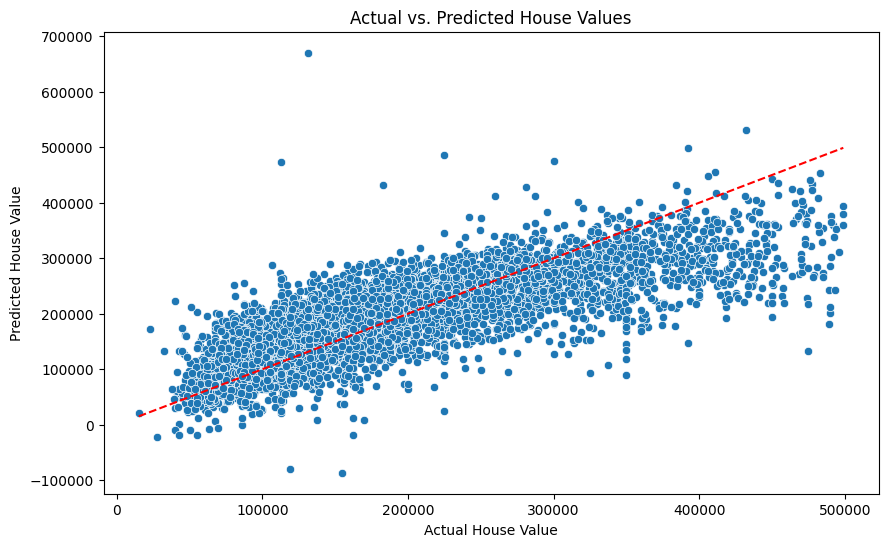

In [ ]:
# Actual vs. Predicted plot of new dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dep_test, y=dep_pred)
plt.plot([dep_test.min(), dep_test.max()], [dep_test.min(), dep_test.max()], 'r--')
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.show()

As can be seen from the graph, the overall model becomes less weird after removing the houses with USD 500,000. Basically all houses hover around that linear regression line in value, but the vast majority of homes fall below that line as their actual value increases.

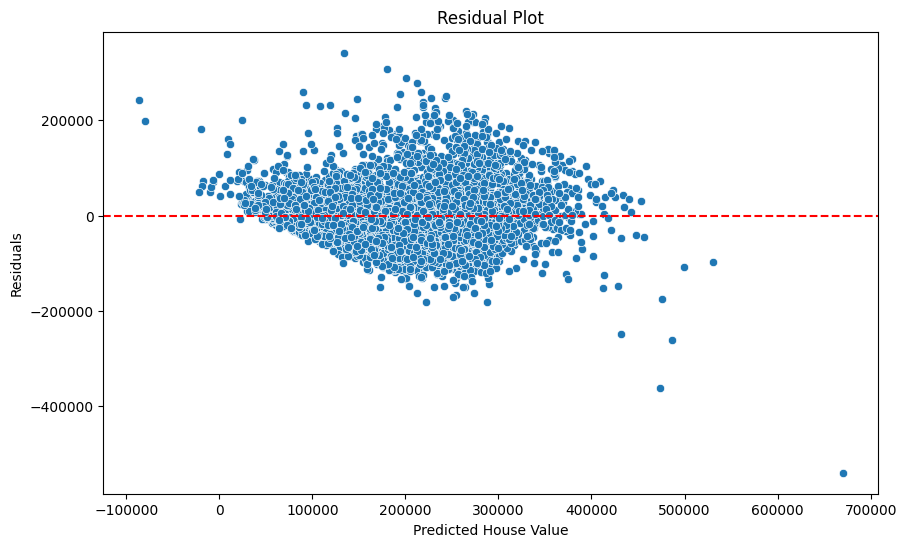

In [ ]:
# Residual plot of new dataset
residuals = dep_test - dep_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dep_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals')
plt.show()

The residual plot shows the residuals scattered randomly around the horizontal axis,  with some obvious outliers and an increasing trend first then a decreasing trend.  The variance is therefore indeterminate, which may lead to slight errors in the model's predictions on average. This is similar to not removing USD 500,000 of house value.

In addition, it can be seen from the figure that the diagonal line of residual, which is opposite to the residual trend, is caused by the actual value of USD 500,000.

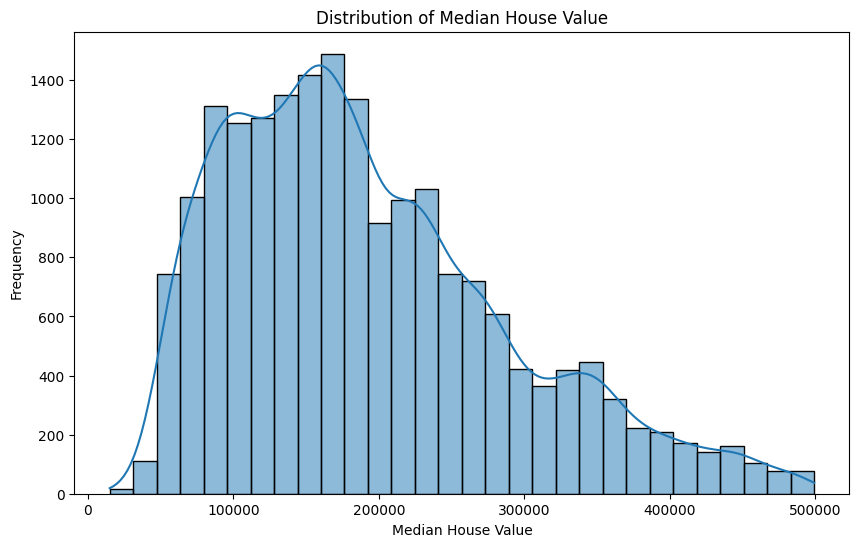

In [ ]:
# Histogram of the target variable, now with the new dataset
plt.figure(figsize=(10, 6))
sns.histplot(newdataset['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

The histogram of median_house_value clearly shows the right skewness of house values ​​when compared to the previous plot without removing the 500,000 house value. This means that most of the observations are concentrated near the lower values, and some extreme values ​​significantly increase the mean value, making it greater than the median.

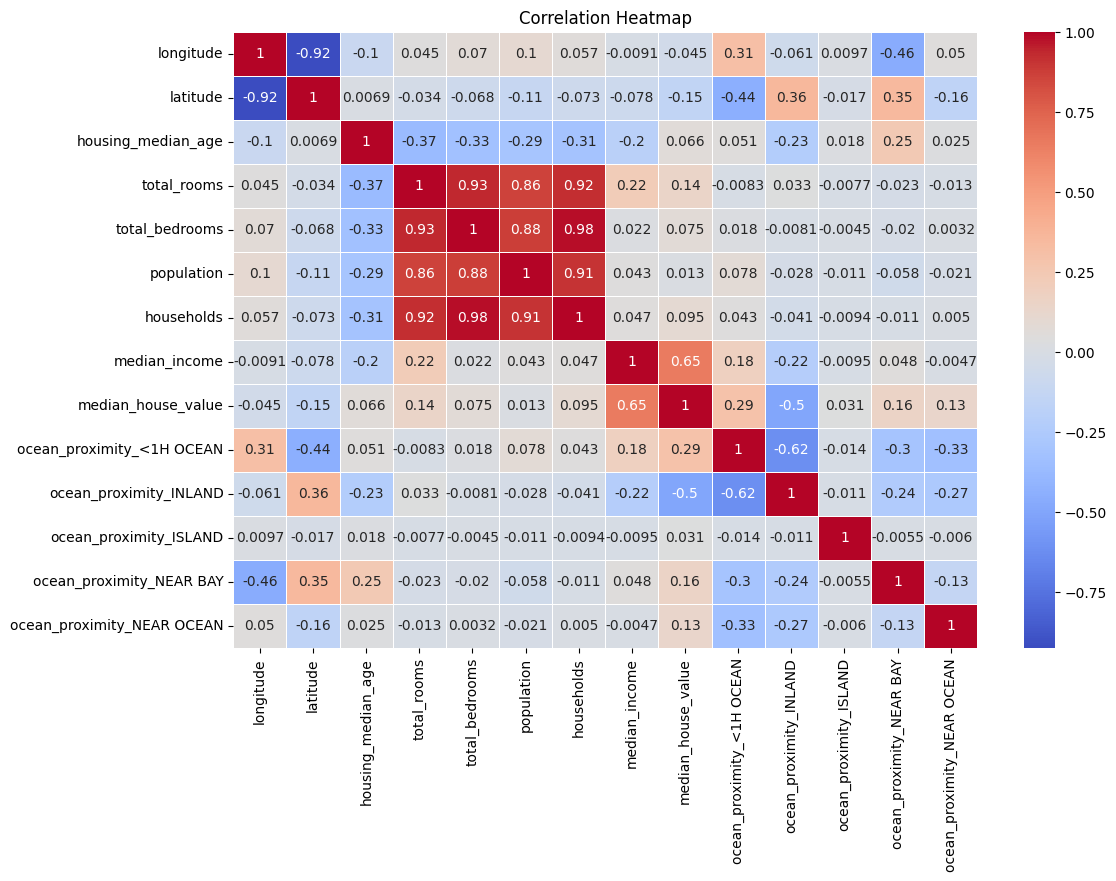

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = pd.get_dummies(newdataset, columns=["ocean_proximity"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Based on the heatmap, there is a high correlation between **total_rooms**, **total_bedrooms, household**, and **population**; suggesting that as each variable increases, the other 3 variables increase as well. But, these variables provide insufficient data to determine whether this affects housing price as each of the 4 variables show a weak correlation when compared to **median_house_price**.


The scatterplot graphs comparing each independent variable with **median_house_values** and feature importance graph were abstained as there are not much nor any substantial changes to the graphs. The previous analyses on the scatterplots and feature importance graph still hold true.

With all analyses in mind, the group can conclude the following:

Removing the entries with a house price of USD 500,000 can slightly improve the model. Even though the R-squared value will decrease slightly, the MSE will go down significantly as well as the MSA. It results in making the model more accurate, rather than degrading the model's performance. However, the rest of the tests (scatterplot, feature importance, other graphs) have either been slightly improved or remain unchanged. It reinforces that the removal of entries does improve the model, but only by a slight margin.


### CONCLUSION

To conclude, this study aimed to explore and predict housing values using historical data from a 1990 census dataset of Californian housing. By utilizing machine learning algorithms, the group developed a model to estimate house values based on features such as the number of bedrooms, income of homeowners, and proximity to the ocean. The primary goal was to understand how past housing prices compare to current trends and verify whether the past prices were more affordable.

The group’s analysis revealed that the overall performance of the model improved, as indicated by a significant reduction in Mean Squared Error (MSE) and a decrease in Mean Absolute Error (MAE).  However, for our model, the original dataset showed partial inconsistent data which were house values above 500k. Regardless, not including the outliers resulted in a more accurate model with predictions closer to actual house prices. The ANOVA tests further supported these findings, demonstrating that the differences in house values across various ocean proximity categories are statistically significant.

In summary, the study validates the notion that housing prices have varied significantly based on different factors, corroborating the alternate hypothesis that proximity to the ocean influences house values. The machine learning model's predictions, combined with statistical testing, provide a comprehensive understanding of historical housing price trends. The model offers valuable insights into past economic conditions and pricing dynamics, affirming that housing affordability has indeed shifted over time.
